<div style="background-color:#3c3d41;padding:30px;border-radius:5px">

<h1 style="font-size:22px;color:white;margin-top:0px">
How to read and plot FIREX-AQ MASTER L1 with python ?
</h1>

<p style="font-size:14px;color:white">
Author: Benjamin Marchant<br>
License: CC BY 4.0
</p>
  
</div>

In [41]:
import glob
import pprint
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from matplotlib.pyplot import figure
from pyhdf.SD import SD, SDC 
from pyhdf.HDF import *
from pyhdf.VS import *
from scipy import constants

In [42]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [43]:
root = '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/'

In [44]:
MASTER_L1_Files = glob.glob('{}*.hdf'.format(root))

len(MASTER_L1_Files)

354

In [45]:
MASTER_L1_Files[0:10]

['/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981712_01_20190722_1946_1949_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981712_02_20190722_1950_1958_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981712_03_20190722_1959_2009_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981712_04_20190722_2010_2018_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981712_05_20190722_2314_2321_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981712_06_20190723_0004_0006_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981712_07_20190723_0044_0046_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981713_01_20190724_2135_2146_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981713_02_20190724_2152_2155_V01.hdf',
 '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981713_03_20190724_2155_2159_V01.hdf']

## Read a MASTER L1 file

In [46]:
file_name = '/Volumes/HD2/Datasets/Research/NASA/FIREXAQ/L1/MASTERL1B_1981715_15_20190730_0219_0231_V01.hdf'

file = SD(file_name, SDC.READ)

file.info()

(38, 49)

In [47]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print( idx, sds )

0 Left50%ResponseWavelength
1 Central100%ResponseWavelength
2 Right50%ResponseWavelength
3 EffectiveCentralWavelength_IR_bands
4 TemperatureCorrectionSlope
5 TemperatureCorrectionIntercept
6 SolarSpectralIrradiance
7 DataSetHeader
8 ScanLineCounter
9 GreenwichMeanTime
10 YearMonthDay
11 AircraftRollCount
12 BlackBody1Temperature
13 BlackBody2Temperature
14 ScanRate
15 ScanlineTime
16 AircraftLatitude
17 AircraftLongitude
18 AircraftHeading
19 AircraftAltitude
20 AircraftPitch
21 TBack
22 AnalogGain
23 AnalogOffset
24 BlackBody1Counts
25 BlackBody2Counts
26 Head1Counts
27 Head2Counts
28 CalibrationSlope
29 CalibrationIntercept
30 PixelLatitude
31 PixelLongitude
32 PixelElevation
33 SensorZenithAngle
34 SensorAzimuthAngle
35 SolarZenithAngle
36 SolarAzimuthAngle
37 CalibratedData


## Read central wavelength

In [48]:
sds_obj = file.select('Central100%ResponseWavelength') # select sds

wls = sds_obj.get() # get sds data

In [49]:
wls.shape

(50,)

In [50]:
pprint.pprint( sds_obj.attributes() )

{'units': 'microns'}


In [51]:
wls

array([ 0.462,  0.5  ,  0.546,  0.58 ,  0.654,  0.712,  0.752,  0.802,
        0.868,  0.906,  0.948,  1.602,  1.658,  1.714,  1.768,  1.824,
        1.876,  1.928,  1.976,  2.078,  2.16 ,  2.21 ,  2.26 ,  2.318,
        2.388,  4.06 ,  3.285,  3.45 ,  3.6  ,  3.755,  3.91 ,  4.06 ,
        4.244,  4.378,  4.525,  4.685,  4.84 ,  4.985,  5.13 ,  5.26 ,
        7.81 ,  8.2  ,  8.6  ,  9.05 ,  9.64 , 10.08 , 10.71 , 11.33 ,
       12.13 , 12.82 ], dtype=float32)

In [52]:
for idx,i in enumerate(wls):
    print(idx,i)

0 0.462
1 0.5
2 0.546
3 0.58
4 0.654
5 0.712
6 0.752
7 0.802
8 0.868
9 0.906
10 0.948
11 1.602
12 1.658
13 1.714
14 1.768
15 1.824
16 1.876
17 1.928
18 1.976
19 2.078
20 2.16
21 2.21
22 2.26
23 2.318
24 2.388
25 4.06
26 3.285
27 3.45
28 3.6
29 3.755
30 3.91
31 4.06
32 4.244
33 4.378
34 4.525
35 4.685
36 4.84
37 4.985
38 5.13
39 5.26
40 7.81
41 8.2
42 8.6
43 9.05
44 9.64
45 10.08
46 10.71
47 11.33
48 12.13
49 12.82


In [54]:
df_wl = pd.DataFrame()

for variable in ['Left50%ResponseWavelength','Central100%ResponseWavelength','Right50%ResponseWavelength']:
    sds_obj = file.select(variable)
    data = sds_obj.get() # get sds data
    df_wl[variable] = data.ravel()
    
df_wl['Spectral_Width'] = df_wl['Right50%ResponseWavelength'] - df_wl['Left50%ResponseWavelength']

df_wl.index += 1 

df_wl

,Left50%ResponseWavelength,Central100%ResponseWavelength,Right50%ResponseWavelength,Spectral_Width
1,0.440,0.462,0.481,0.041000
2,0.477,0.500,0.522,0.045000
3,0.521,0.546,0.564,0.043000
4,0.562,0.580,0.603,0.041000
5,0.633,0.654,0.692,0.059000
6,0.692,0.712,0.733,0.041000
7,0.732,0.752,0.772,0.040000
8,0.781,0.802,0.822,0.041000
9,0.847,0.868,0.888,0.041000
10,0.887,0.906,0.928,0.041000


In [58]:
html_code = df_wl.to_html()
html_code = html_code.replace('\n','')

html_code

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Left50%ResponseWavelength</th>      <th>Central100%ResponseWavelength</th>      <th>Right50%ResponseWavelength</th>      <th>Spectral_Width</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>0.440</td>      <td>0.462</td>      <td>0.481</td>      <td>0.041000</td>    </tr>    <tr>      <th>2</th>      <td>0.477</td>      <td>0.500</td>      <td>0.522</td>      <td>0.045000</td>    </tr>    <tr>      <th>3</th>      <td>0.521</td>      <td>0.546</td>      <td>0.564</td>      <td>0.043000</td>    </tr>    <tr>      <th>4</th>      <td>0.562</td>      <td>0.580</td>      <td>0.603</td>      <td>0.041000</td>    </tr>    <tr>      <th>5</th>      <td>0.633</td>      <td>0.654</td>      <td>0.692</td>      <td>0.059000</td>    </tr>    <tr>      <th>6</th>      <td>0.692</td>      <td>0.712</td>      <td>0.733</td>      <td>0.041000</td>    </tr>    <tr>      <th>7</th>  

In [14]:
df_wl.iloc[31]

Left50%ResponseWavelength        3.981
Central100%ResponseWavelength    4.060
Right50%ResponseWavelength       4.128
Spectral_Width                   0.147
Name: 31, dtype: float32

In [15]:
df_wl.iloc[31]['Spectral_Width']

0.14699984

## Read longitude and latitude

In [16]:
df_geo = pd.DataFrame()

for variable in ['PixelLongitude','PixelLatitude']:
    sds_obj = file.select(variable)
    data = sds_obj.get() # get sds data
    df_geo[variable] = data.ravel()
    
df_geo

,PixelLongitude,PixelLatitude
0,-120.371639,42.494111
1,-120.371405,42.493905
2,-120.371191,42.493716
3,-120.371054,42.493590
4,-120.370844,42.493405
...,...,...
12422595,-121.414409,41.654469
12422596,-121.414205,41.654282
12422597,-121.414020,41.654113
12422598,-121.413863,41.653969


## Read Calibrated Data

In [17]:
sds_obj = file.select('CalibratedData') # select sds

CalibratedData = sds_obj.get() # get sds data

In [18]:
CalibratedData.shape

(17350, 50, 716)

In [19]:
pprint.pprint( sds_obj.attributes() )

{'_FillValue': -999,
 'scale_factor': [0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.10000000149011612,
                  0.017999999225139618,
                  0.014999999664723873,
                  0.014999999664723873,
                  0.014999999664723873,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.009999999776482582,
                  0.0099999997

In [20]:
CalibratedData_Scale_Factor = sds_obj.attributes()['scale_factor']

In [63]:
CalibratedData_Scale_Factor

[0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.017999999225139618,
 0.014999999664723873,
 0.014999999664723873,
 0.014999999664723873,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.10000000149011612,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.0010000000474974513,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,
 0.009999999776482582,

## Plot calibrated data at a specific wavelength

In [68]:
band_idx = 32

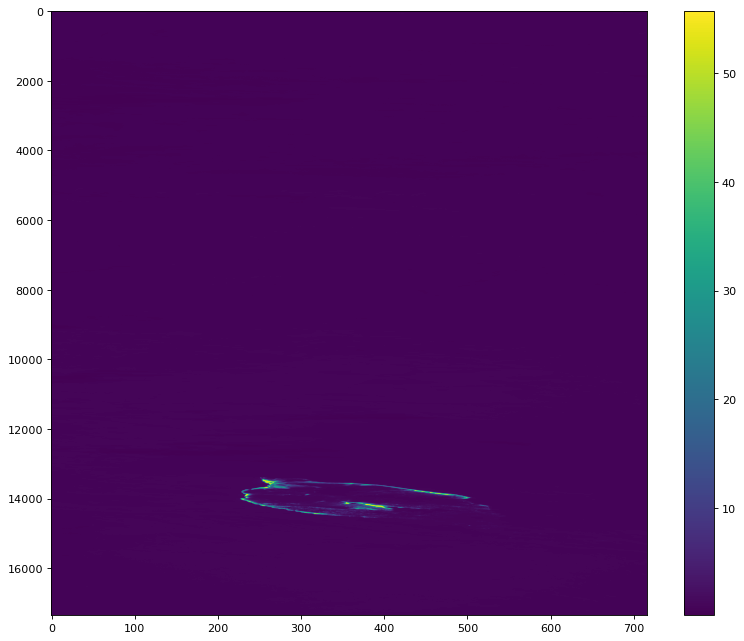

In [69]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(CalibratedData[:,band_idx-1,:]*CalibratedData_Scale_Factor[band_idx-1], aspect='auto')

plt.colorbar()

plt.show()

In [66]:
band_idx = 26

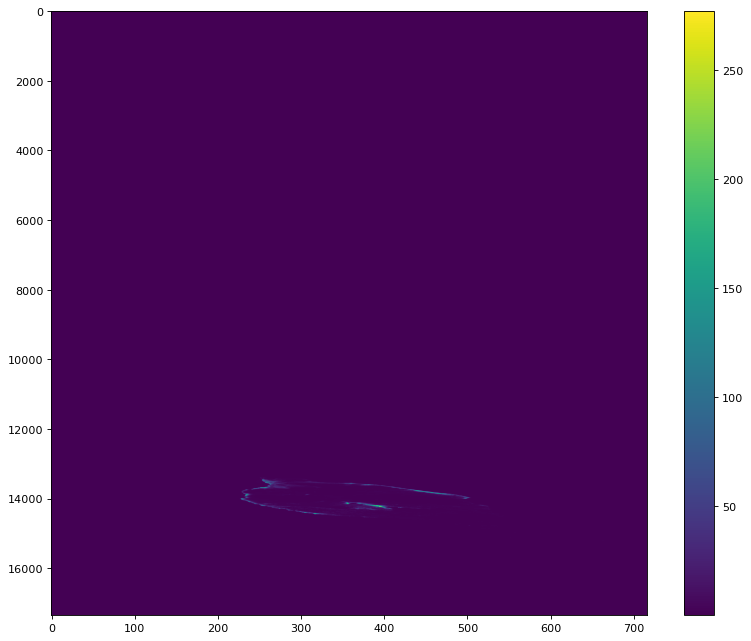

In [67]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(CalibratedData[:,band_idx-1,:]*CalibratedData_Scale_Factor[band_idx-1], aspect='auto')

plt.colorbar()

plt.show()

## Convert calibrated data to radiance

4.06


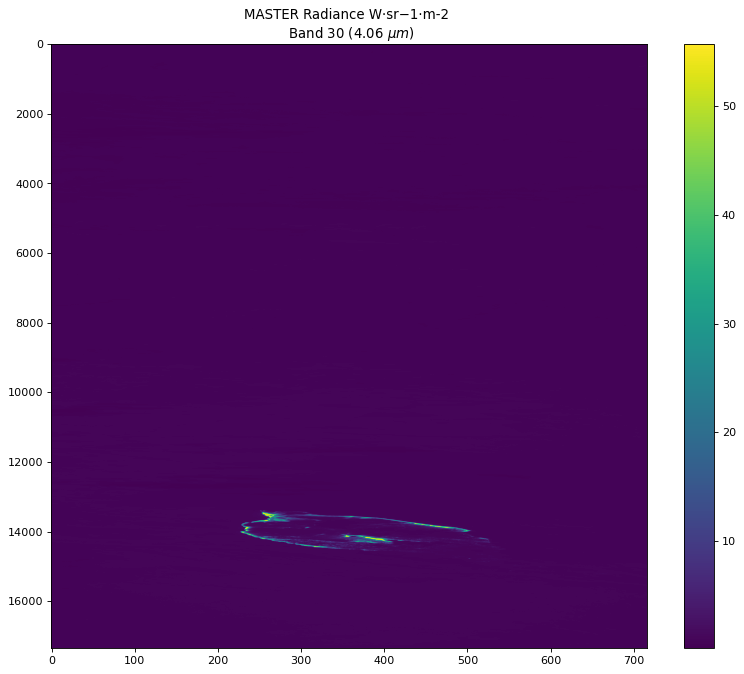

In [23]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(CalibratedData[:,band_idx,:]* CalibratedData_Scale_Factor[band_idx], aspect='auto')

wl = round( df_wl.iloc[band_idx]['Central100%ResponseWavelength'] , 2)

print(wl)

plt.title( 'MASTER Radiance W⋅sr−1⋅m-2 \n Band {} ({:.2f} $\mu m$)'.format(band_idx-1, wl ) )

plt.colorbar()

plt.show()

## Convert radiance to brightness temperature

Utilizing Central Wavelength and Planck Inverse Function, we can convert Radiance to Brightness Temperature with a rough accuracy. Integrating the spectral response table will enable you to attain greater precision.

In [24]:
c = constants.speed_of_light
h = constants.h
k = constants.k

wl = wls[band_idx]*10**-6

K1 = 2 * h * c**2 * wl**-5
K2 = (h*c) / (k*wl)

In [25]:
rad = CalibratedData[:,band_idx,:]* CalibratedData_Scale_Factor[band_idx]

BT = K2 / np.log( K1 / rad + 1 ) / (2*df_wl.iloc[band_idx]['Spectral_Width'])

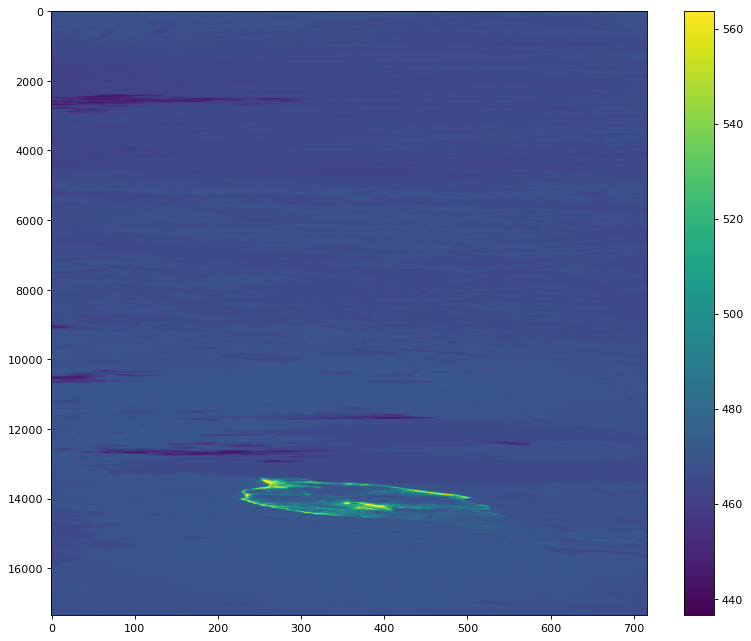

In [26]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111)

plt.imshow(BT, aspect='auto')

plt.colorbar()


plt.show()

In [27]:
BT.max()

563.6584977140525

## Stored all radiances in a Pandas dataframe 

In [28]:
df_rad = pd.DataFrame()

for band_idx in range(50):
    
    df_rad['Radiance_{:02d}'.format(band_idx+1) ] = CalibratedData[:,band_idx,:].ravel() * CalibratedData_Scale_Factor[band_idx]

df_rad

,Radiance_01,Radiance_02,Radiance_03,Radiance_04,Radiance_05,Radiance_06,Radiance_07,Radiance_08,Radiance_09,Radiance_10,...,Radiance_41,Radiance_42,Radiance_43,Radiance_44,Radiance_45,Radiance_46,Radiance_47,Radiance_48,Radiance_49,Radiance_50
0,65.800001,72.300001,70.200001,68.100001,67.900001,63.900001,58.900001,55.600001,51.600001,43.100001,...,4.20,6.50,7.67,8.10,7.87,8.35,8.00,7.16,6.26,5.44
1,58.300001,62.800001,60.400001,58.400001,57.600001,54.100001,49.600001,46.600001,43.400001,36.200001,...,4.43,6.78,7.91,8.33,8.22,8.62,8.34,7.47,6.62,5.64
2,51.600001,54.800001,52.900001,50.500001,49.000001,45.700001,42.300001,39.800001,36.800001,30.000000,...,4.50,7.02,8.26,8.61,8.48,9.01,8.77,7.97,7.14,6.33
3,46.200001,48.500001,46.100001,44.000001,42.400001,39.000001,36.200001,33.900001,31.900000,25.700000,...,4.60,7.20,8.48,8.91,8.74,9.35,9.03,8.52,7.52,6.76
4,42.000001,43.800001,41.600001,39.600001,37.400001,34.500001,31.900000,29.500000,27.400000,22.200000,...,4.66,7.37,8.60,9.05,8.86,9.37,9.17,8.54,7.77,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12422595,15.100000,13.100000,10.900000,8.500000,6.200000,6.900000,11.300000,13.100000,12.900000,9.800000,...,5.16,7.81,8.81,9.23,9.19,9.30,9.24,8.93,8.49,7.67
12422596,15.900000,13.200000,11.100000,8.400000,6.200000,5.500000,6.100000,5.400000,5.000000,3.800000,...,5.10,7.74,8.85,9.18,9.12,9.30,9.21,8.83,8.46,7.48
12422597,16.400000,14.400000,11.600000,9.600000,7.300000,6.900000,6.900000,6.600000,5.900000,4.100000,...,4.96,7.82,8.90,9.15,9.14,9.39,9.22,8.91,8.41,7.38
12422598,15.800000,14.100000,11.900000,9.300000,7.400000,10.200000,16.100000,16.400000,17.000000,9.400000,...,5.07,7.82,8.98,9.37,9.25,9.42,9.39,8.94,8.58,7.65


In [29]:
data = df_rad['Radiance_30'].to_numpy()

In [30]:
data = data.reshape((17350, 716))

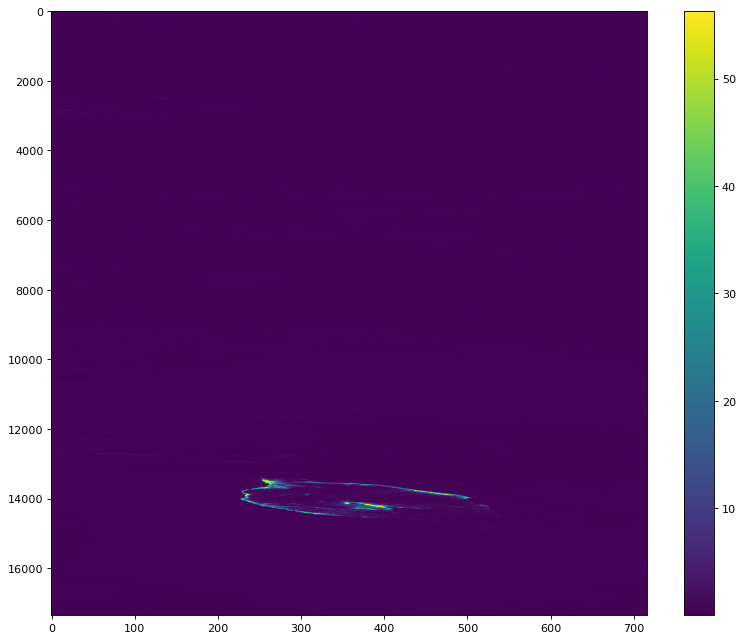

In [31]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(data, aspect='auto')

plt.colorbar()

plt.show()

## Create a scatter plot using two columns

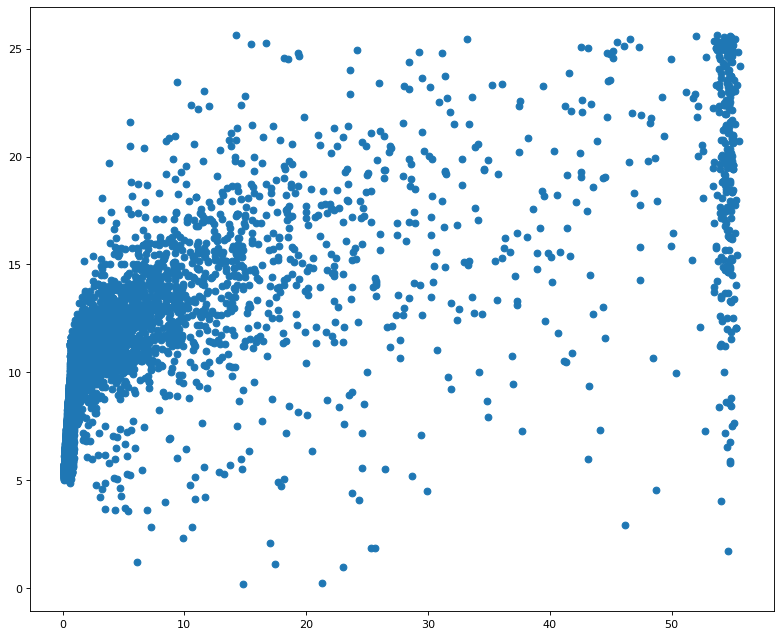

In [55]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

df_sub = df_rad[ df_rad['Radiance_47'] > 0  ]

df_sub = df_sub.sample(500000)

plt.scatter(df_sub['Radiance_32'], df_sub['Radiance_47'])

plt.show()

## Create a histogram using one column

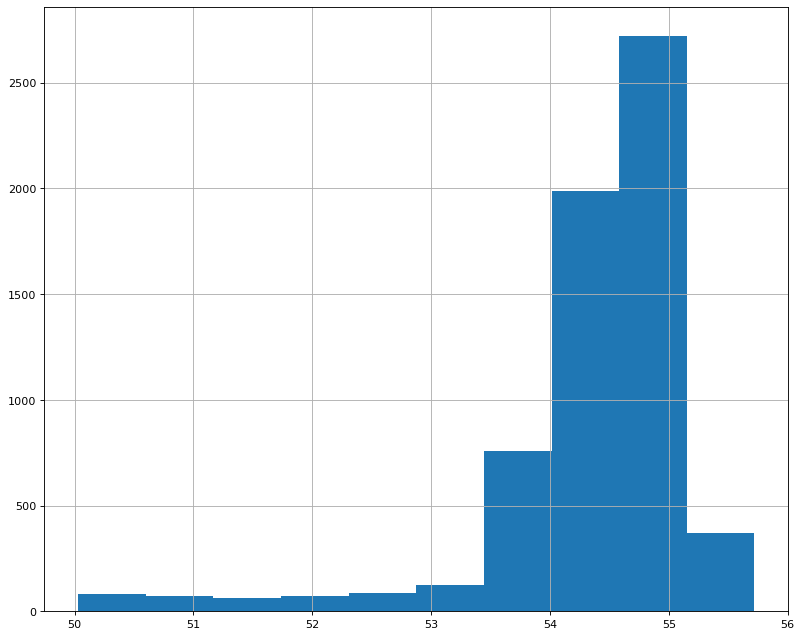

In [56]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

df_rad['Radiance_32'][ (df_rad['Radiance_32'] > 50)  ].hist()
#df_rad['Radiance_31'].hist()

plt.show()

In [34]:
df_rad['Radiance_31'].max()

54.119998790323734

In [35]:
df_rad['Radiance_31'][ (df_rad['Radiance_31'] == df_rad['Radiance_31'].max())  ]

10102285    54.119999
10102286    54.119999
10102401    54.119999
Name: Radiance_31, dtype: float64

## Close the file

In [36]:
file.end()

In [80]:
df_band_32 = pd.DataFrame()

band_idx = 32

for MASTER_L1_File in MASTER_L1_Files:
    
    file = SD(MASTER_L1_File, SDC.READ)
    
    sds_obj = file.select('CalibratedData') # select sds

    CalibratedData = sds_obj.get() # get sds data
    
    CalibratedData_Scale_Factor = sds_obj.attributes()['scale_factor']
    
    df_new = pd.DataFrame()
    
    data = CalibratedData[:,band_idx-1,:]* CalibratedData_Scale_Factor[band_idx-1]
    
    df_new['Rad32'] = data.ravel()
    
    df_new['Rad32'] = df_new['Rad32'][ df_new['Rad32'] > 50 ]
    
    df_band_32 = pd.concat([df_band_32,df_new], ignore_index=True)
    
    file.end()
    
    print(MASTER_L1_File.split('/')[-1])

MASTERL1B_1981712_01_20190722_1946_1949_V01.hdf
MASTERL1B_1981712_02_20190722_1950_1958_V01.hdf
MASTERL1B_1981712_03_20190722_1959_2009_V01.hdf
MASTERL1B_1981712_04_20190722_2010_2018_V01.hdf
MASTERL1B_1981712_05_20190722_2314_2321_V01.hdf
MASTERL1B_1981712_06_20190723_0004_0006_V01.hdf
MASTERL1B_1981712_07_20190723_0044_0046_V01.hdf
MASTERL1B_1981713_01_20190724_2135_2146_V01.hdf
MASTERL1B_1981713_02_20190724_2152_2155_V01.hdf
MASTERL1B_1981713_03_20190724_2155_2159_V01.hdf
MASTERL1B_1981713_04_20190724_2245_2252_V01.hdf
MASTERL1B_1981713_05_20190724_2346_2351_V01.hdf
MASTERL1B_1981713_06_20190725_0014_0019_V01.hdf
MASTERL1B_1981714_01_20190725_2214_2217_V01.hdf
MASTERL1B_1981714_02_20190725_2237_2243_V01.hdf
MASTERL1B_1981714_03_20190725_2248_2249_V01.hdf
MASTERL1B_1981714_04_20190725_2327_2336_V01.hdf
MASTERL1B_1981714_05_20190726_0120_0134_V01.hdf
MASTERL1B_1981714_06_20190726_0317_0325_V01.hdf
MASTERL1B_1981714_07_20190726_0336_0339_V01.hdf
MASTERL1B_1981715_01_20190729_2215_2217_

MASTERL1B_1981728_02_20190823_1818_1819_V01.hdf
MASTERL1B_1981728_03_20190823_1821_1821_V01.hdf
MASTERL1B_1981728_04_20190823_1834_1835_V01.hdf
MASTERL1B_1981728_05_20190823_1837_1838_V01.hdf
MASTERL1B_1981728_06_20190823_1853_1854_V01.hdf
MASTERL1B_1981728_07_20190823_1856_1857_V01.hdf
MASTERL1B_1981728_08_20190823_1901_1901_V01.hdf
MASTERL1B_1981728_09_20190823_1904_1905_V01.hdf
MASTERL1B_1981728_10_20190823_1907_1908_V01.hdf
MASTERL1B_1981728_11_20190823_1911_1913_V01.hdf
MASTERL1B_1981728_12_20190823_1915_1916_V01.hdf
MASTERL1B_1981728_13_20190823_1919_1921_V01.hdf
MASTERL1B_1981728_14_20190823_1925_1927_V01.hdf
MASTERL1B_1981728_15_20190823_1929_1930_V01.hdf
MASTERL1B_1981728_16_20190823_1948_1949_V01.hdf
MASTERL1B_1981728_17_20190823_1951_1952_V01.hdf
MASTERL1B_1981728_18_20190823_2004_2005_V01.hdf
MASTERL1B_1981728_19_20190823_2009_2011_V01.hdf
MASTERL1B_1981728_20_20190823_2014_2015_V01.hdf
MASTERL1B_1981728_21_20190823_2021_2022_V01.hdf
MASTERL1B_1981728_22_20190823_2028_2029_

MASTERL1B_1981733_24_20190903_2052_2052_V01.hdf
MASTERL1B_1981733_25_20190903_2054_2054_V01.hdf
MASTERL1B_1981733_26_20190903_2056_2057_V01.hdf
MASTERL1B_1981733_27_20190903_2105_2107_V01.hdf
MASTERL1B_1981733_28_20190903_2109_2110_V01.hdf
MASTERL1B_1981733_29_20190903_2116_2116_V01.hdf
MASTERL1B_1981733_30_20190903_2140_2148_V01.hdf
MASTERL1B_1981733_31_20190903_2148_2155_V01.hdf
MASTERL1B_1981733_32_20190903_2156_2204_V01.hdf
MASTERL1B_1981733_33_20190903_2204_2210_V01.hdf
MASTERL1B_1981733_34_20190903_2212_2220_V01.hdf
MASTERL1B_1981733_35_20190903_2220_2228_V01.hdf


(50.0, 70.0)

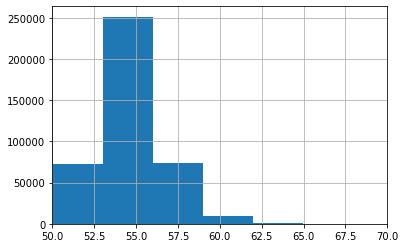

In [84]:
df_band_32['Rad32'].hist(bins=20)

plt.xlim(50,70)